# Decision Trees and Random Forests

* Random forests are an example of an ensemble method, meaning one that relies on aggregating the results of a set of simpler estimators.

# A. Decision Trees:

* Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification.
    * The binary splitting makes this extremely efficient:
        * In a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing
the options even among a large number of classes.
        * The trick comes in deciding which questions to ask at each step.

* In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data:
        * Each node in the tree splits the data into two groups using a cutoff value within one of the features.

* Random forests are an example of an ensemble learner built on decision trees.


### A.1. Creating a Decision Tree

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

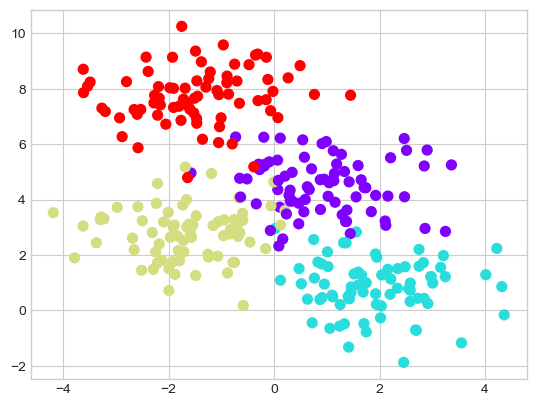

In [2]:
# Create a 2D data w/ 4 class labels:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

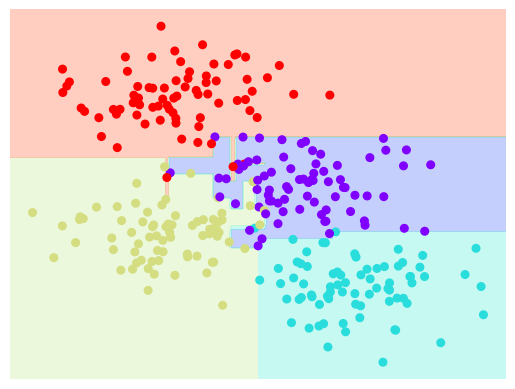

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [6]:
import dt_interactive_viz
dt_interactive_viz.plot_tree_interactive(X, y);

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

### A.2. Decision Trees and Overfitting

* It is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the
overall properties of the distributions it is drawn from.

* Another way to see this overfitting is to look at models trained on different subsets of the data :
    * Some places the two trees produce consistent results , while in other places the trees give very different classifications.
    * The inconsistencies tend to happen where the classification is less certain.
